In [2]:
# Import data
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

data = pd.read_excel('data.xlsx', index_col=0)
print(data)


                              Independent        Dependent
Article code                                              
A1                        Service Quality     Satisfaction
A1                        Service Quality  Perceived Value
A1                           Satisfaction          Loyalty
A1                         Perceived Risk     Satisfaction
A1                         Perceived Risk  Perceived Value
A1                        Perceived Value          Loyalty
A2                         System Quality  Perceived Value
A2                    Information Quality  Perceived Value
A2                        Service Quality  Perceived Value
A2                        Perceived Value          Loyalty
A3                       Customer Service  Service Quality
A3                             Fulfilment  Service Quality
A3                         Website design  Service Quality
A3                   Privacy and Security  Service Quality
A3                        Service Quality  Perceived Val

In [3]:
import networkx as nx

nodes = np.unique(data[['Independent', 'Dependent']])

In [4]:
M = nx.from_pandas_edgelist(data, 'Independent', 'Dependent', 
# ['Weight'], 
create_using=nx.DiGraph())
# print(M.is_directed(), M.is_multigraph())
# print(M)

{'Service Quality': Text(0.16723641387949856, 0.8470818964187157, 'Service Quality'),
 'Satisfaction': Text(-0.12972089874291684, 0.8754294623954274, 'Satisfaction'),
 'Perceived Value': Text(0.5223335378317238, 0.24116168473147126, 'Perceived Value'),
 'Loyalty': Text(-0.907902848425608, 0.08114399946518466, 'Loyalty'),
 'Perceived Risk': Text(-0.21186534888373176, -0.6371268180253982, 'Perceived Risk'),
 'System Quality': Text(0.6717951263761756, -0.3501730719764439, 'System Quality'),
 'Information Quality': Text(-0.27168483570089547, -0.3137394063257636, 'Information Quality'),
 'Customer Service': Text(-0.6054099825404436, 0.685530723443134, 'Customer Service'),
 'Fulfilment': Text(0.730553438761026, 0.4772960178194721, 'Fulfilment'),
 'Website design': Text(0.7363249683781191, -0.5690309885386932, 'Website design'),
 'Privacy and Security': Text(-0.7155935566355428, 0.4972617335344915, 'Privacy and Security'),
 'Research and Access': Text(-0.710820705256861, -0.4311485081032332, 

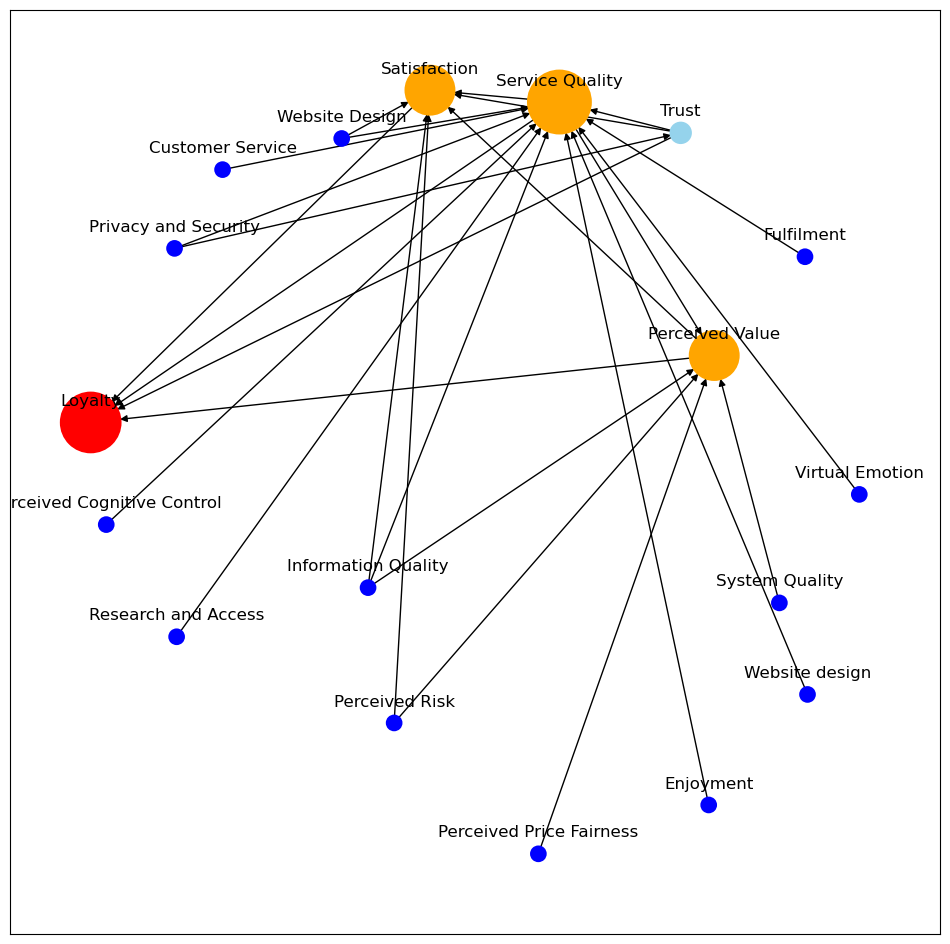

In [7]:
# FINAL

# Canvas settings
plt.figure(1,figsize=(12, 12)) 
    
# Distance between nodes
pos=nx.spring_layout(M, k=2)

# Color white = independent only, dark = indegree only
node_shapes = []
node_sizes=[]
node_colors=[]

# black_theme d is darker
# color_d = '#3d3935'
# color_mostly_d = '#57514b'
# color_mostly_i = '#a29b94'
# color_i = '#b8b3ae'

# purple green theme
color_d = 'red'
color_mostly_d = 'orange'
color_mostly_i = '#95d3ec'
color_i = 'blue'

for node in M.nodes():
    # Size = indegree (The number of edges directed into a vertex in a directed graph)
    count = data.Dependent[data.Dependent == node].count()
    sizes = (1 + count) * 100
    node_sizes.append(sizes)

    # Shape = circle (independent), square (dependent)
    n_independent =  data.Independent[data.Independent == node].count()
    n_dependent =  data.Dependent[data.Dependent == node].count()

    if n_independent > n_dependent:
        node_shapes.append('o')
    else:
        node_shapes.append('s')

    # Color
    total_n = n_independent + n_dependent
    dependent_percentage = n_dependent / total_n

    # print(f'node', node)
    # print(f'dependent_percentage', dependent_percentage)

    if (dependent_percentage) > 0.8:
        node_colors.append(color_d)
    elif (dependent_percentage) > 0.5:
        node_colors.append(color_mostly_d)
    elif (dependent_percentage) < 0.2:
        node_colors.append(color_i)
    else:
        node_colors.append(color_mostly_i)

def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}

# shift the layout
pos_nodes = nudge(pos, 0, 0.05)

# default nodes and edges
nx.draw_networkx(M,
    pos=pos,
    with_labels=False,
    node_color=node_colors,
    node_size = node_sizes,
    node_shape='o',
    linewidths=2
)

# nudged labels
nx.draw_networkx_labels(M, pos=pos_nodes)